# Параметр Тумре

In [1]:
import os
%pylab
%matplotlib inline
%run ./load_notebook.py

Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [2]:
import numpy as np
import scipy.interpolate as inter

In [3]:
import functions

importing Jupyter notebook from functions.ipynb
Using matplotlib backend: TkAgg
Populating the interactive namespace from numpy and matplotlib


In [4]:
Distance = 10.57 # Mpc
incl = 62.
cosi = np.cos(incl / 180. * np.pi)
sini = np.sin(incl / 180. * np.pi)

In [63]:
sigma_s = np.load('./data/sigma_s.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
sigma_HI = np.load('./data/sigma_HI.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_s = np.load('./data/Sigma_s.npy')
sig_R_max = np.load('./data/sig_R_max.npy')
sig_R_min = np.load('./data/sig_R_min.npy')
r_HI = np.load('./data/r_HI.npy')
vel_HI = np.load('./data/vel_HI.npy')
kappa = np.load('./data/kappa.npy')
dist_kpc = np.load('./data/dist_kpc.npy')

In [64]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))

In [65]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
Qeff_max = np.zeros(dist_kpc.shape)
Qeff_min = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
print('Errors:{}'.format(errors))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


In [66]:
np.save('./data/Qg.npy', Qg)
np.save('./data/Qs_min.npy', Qs_min)
np.save('./data/Qs_max.npy', Qs_max)
np.save('./data/Qeff_min.npy', Qeff_min)
np.save('./data/Qeff_max.npy', Qeff_max)
np.save('./data/bark.npy',bark)
np.save('./data/bark_max.npy',bark_max)

Text(0.5, 1.0, '$H_{\\alpha}$')

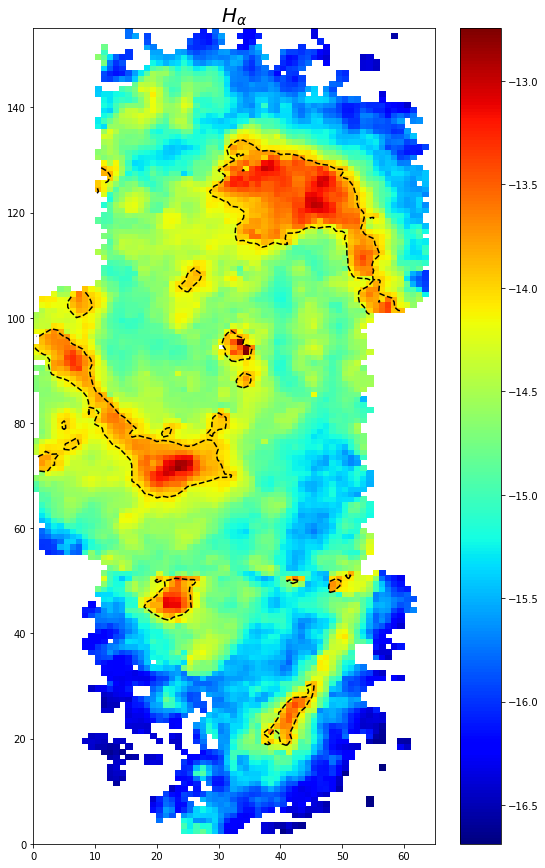

In [67]:
H_alpha = np.load('./data/H_alpha.npy')
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='black')
quadmesh = plt.pcolormesh(X, Y, np.log10(H_alpha), cmap='jet')
plt.colorbar()
plt.title(r'$H_{\alpha}$', fontsize=20)

In [68]:
Qg = np.load('./data/Qg.npy')
Qs_min = np.load('./data/Qs_min.npy')
Qeff_min = np.load('./data/Qeff_min.npy')
Qs_max = np.load('./data/Qs_max.npy')
Qeff_max = np.load('./data/Qeff_max.npy')
bark = np.load('./data/bark.npy')
bark_max = np.load('./data/bark_max.npy')

Text(0.5, 1.0, '$\\bar{k}$')

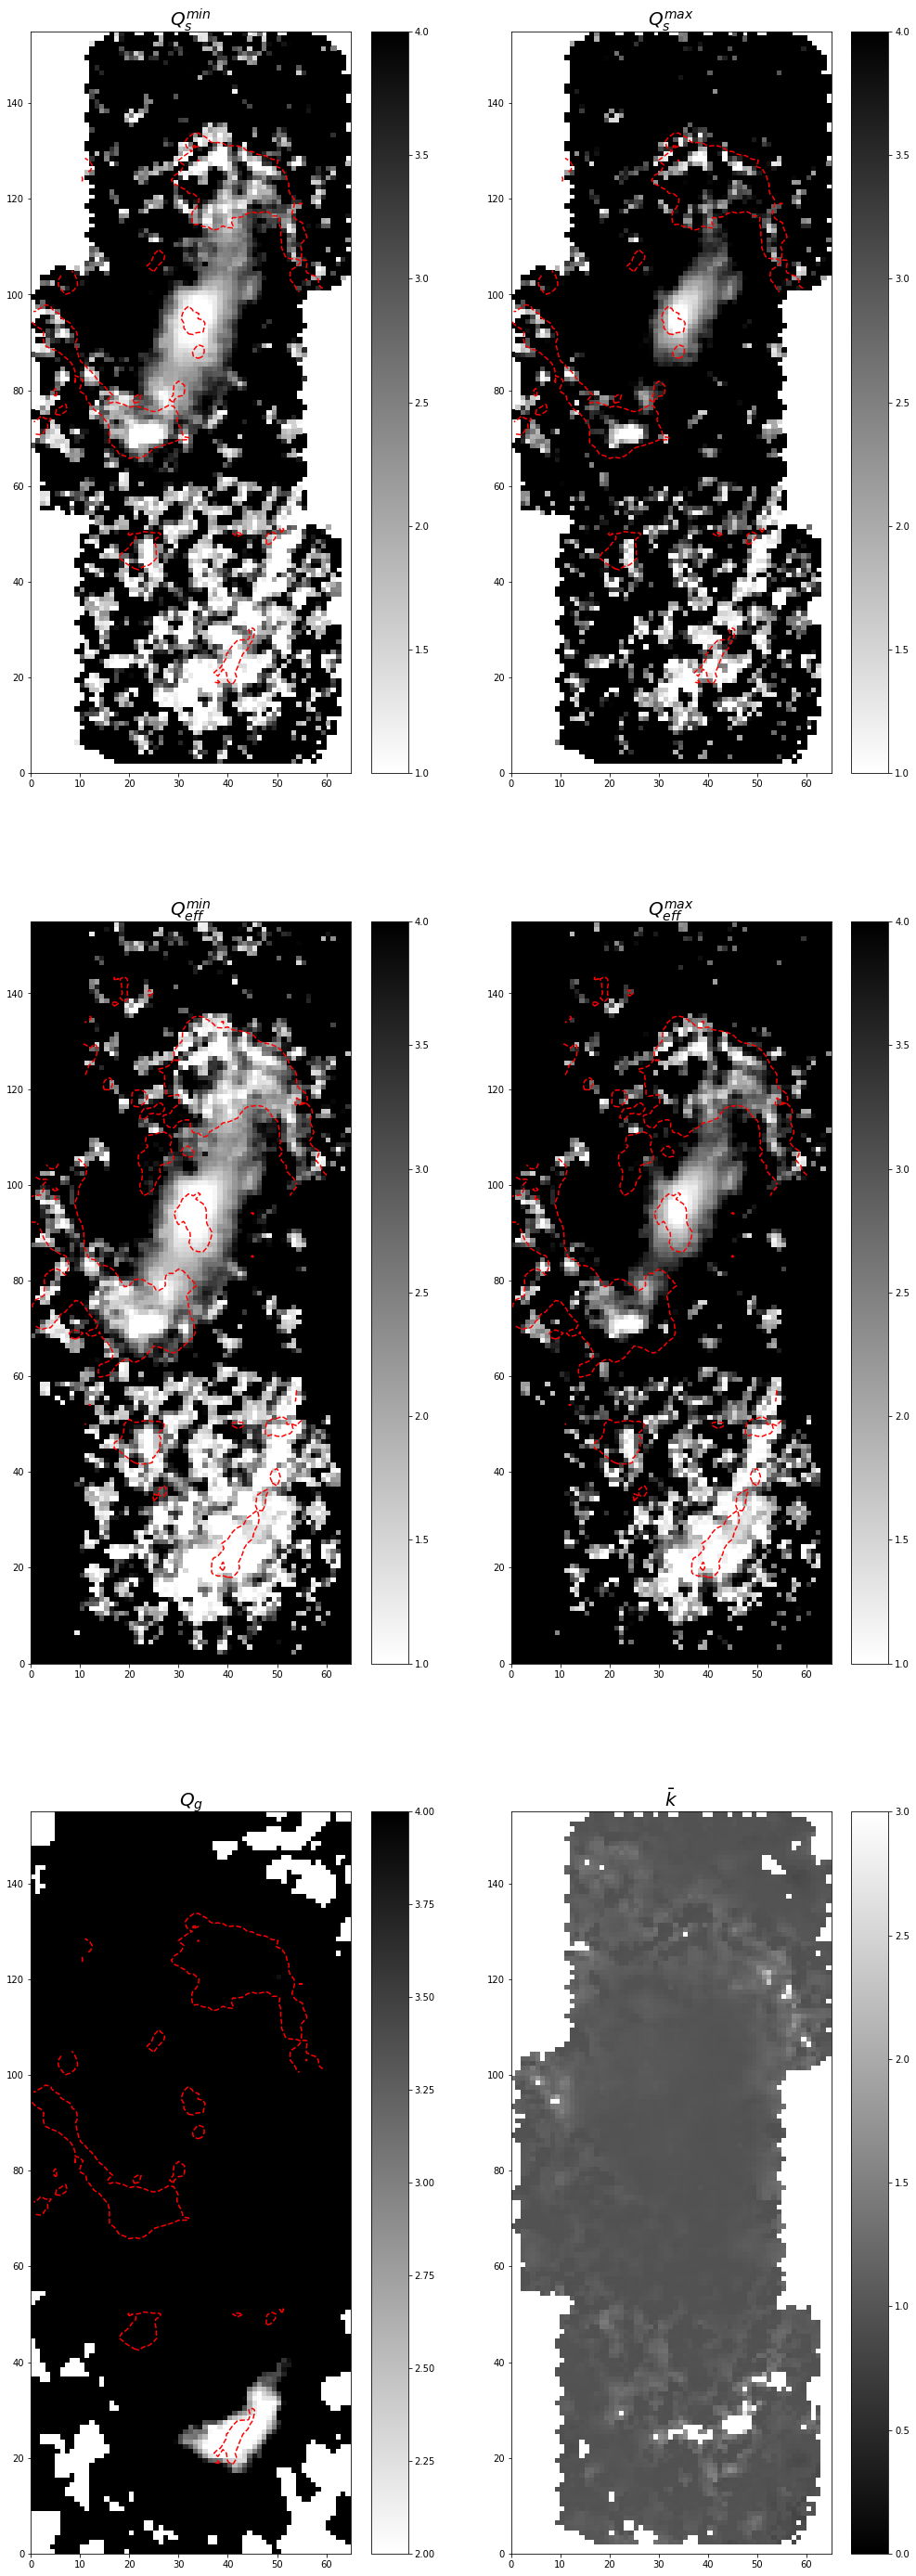

In [69]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 50])
plt.subplot(3,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qs_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{s}^{min}$', fontsize=20)

plt.subplot(3,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qs_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{s}^{max}$', fontsize=20)

plt.subplot(3,2,3)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(3,2,4)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

plt.subplot(3,2,5)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qg, cmap='gist_yarg')
quadmesh.set_clim(vmin=2., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{g}$', fontsize=20)

plt.subplot(3,2,6)
quadmesh = plt.pcolormesh(X, Y, bark, cmap='gray')
quadmesh.set_clim(vmin=0., vmax=3.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$\bar{k}$', fontsize=20)

Text(0.5, 1.0, '$Q_{eff}^{max}$')

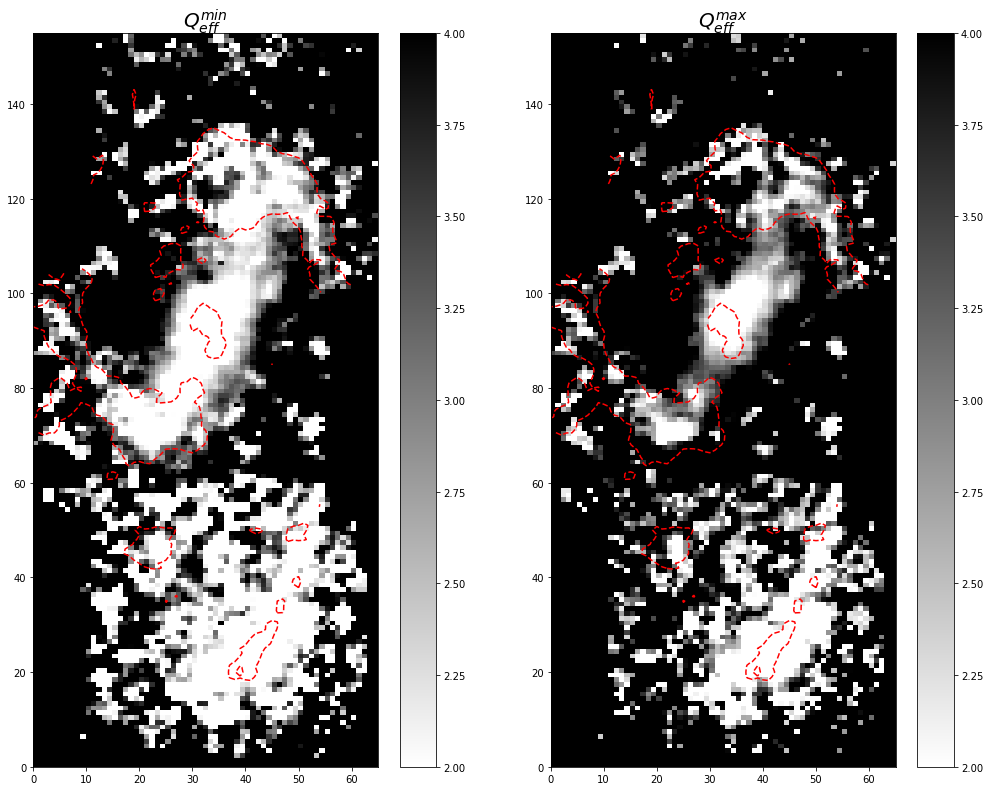

In [70]:

X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=2., vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=2., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

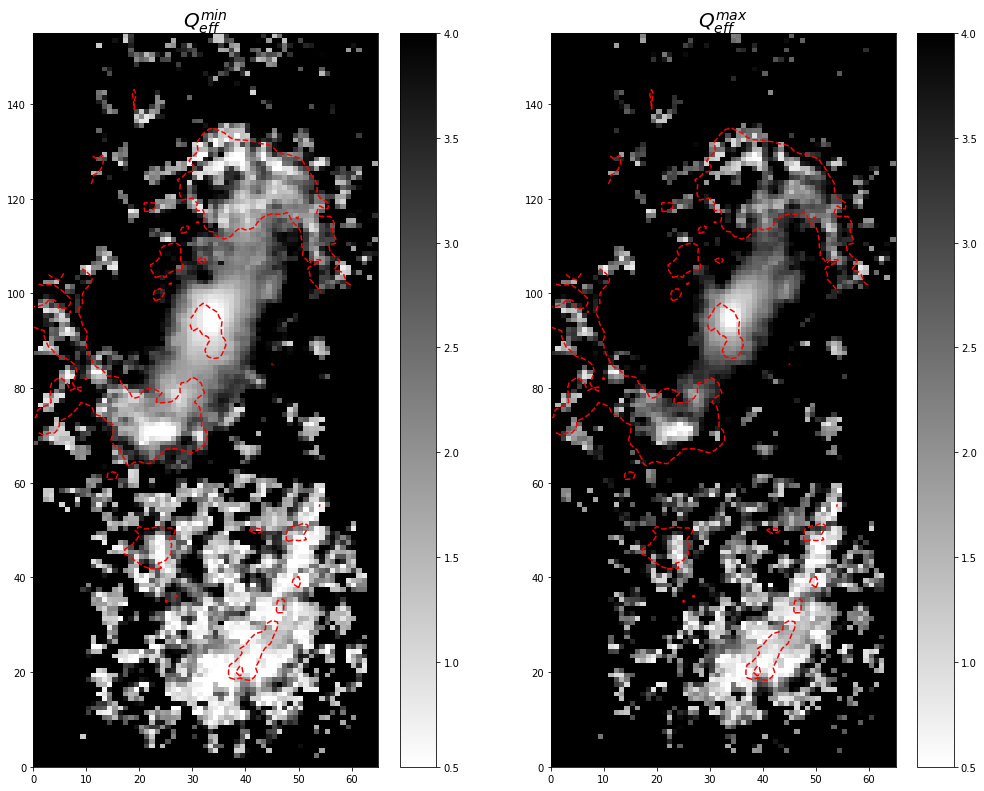

In [71]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=4.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

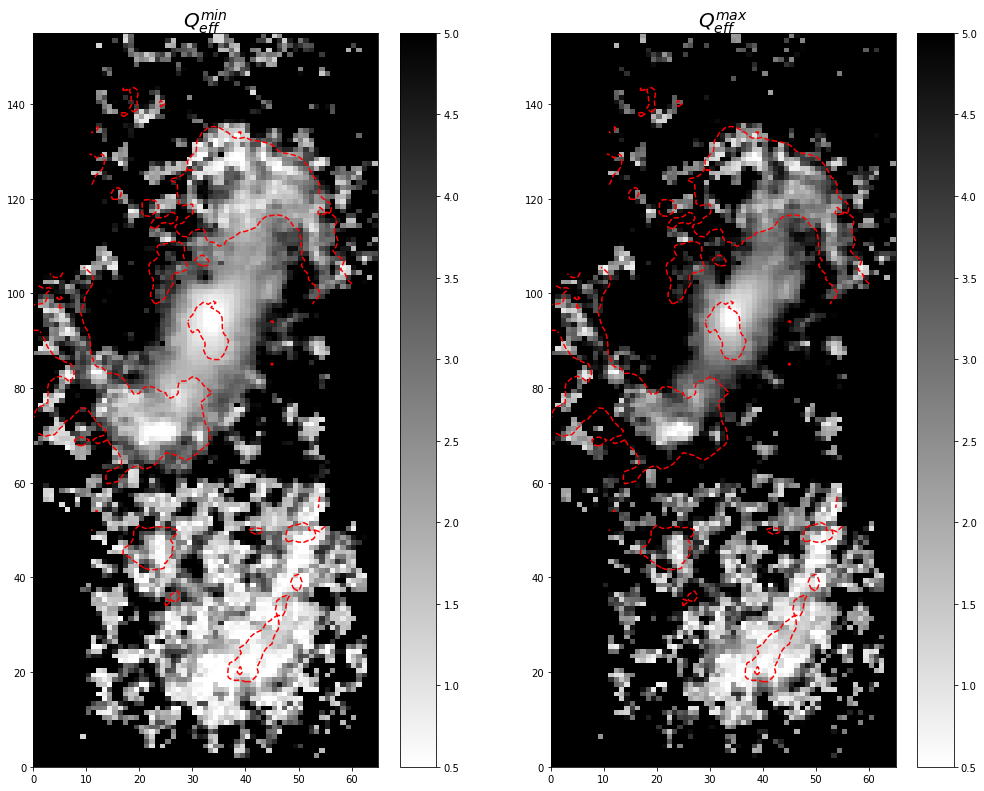

In [72]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=5.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=5.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

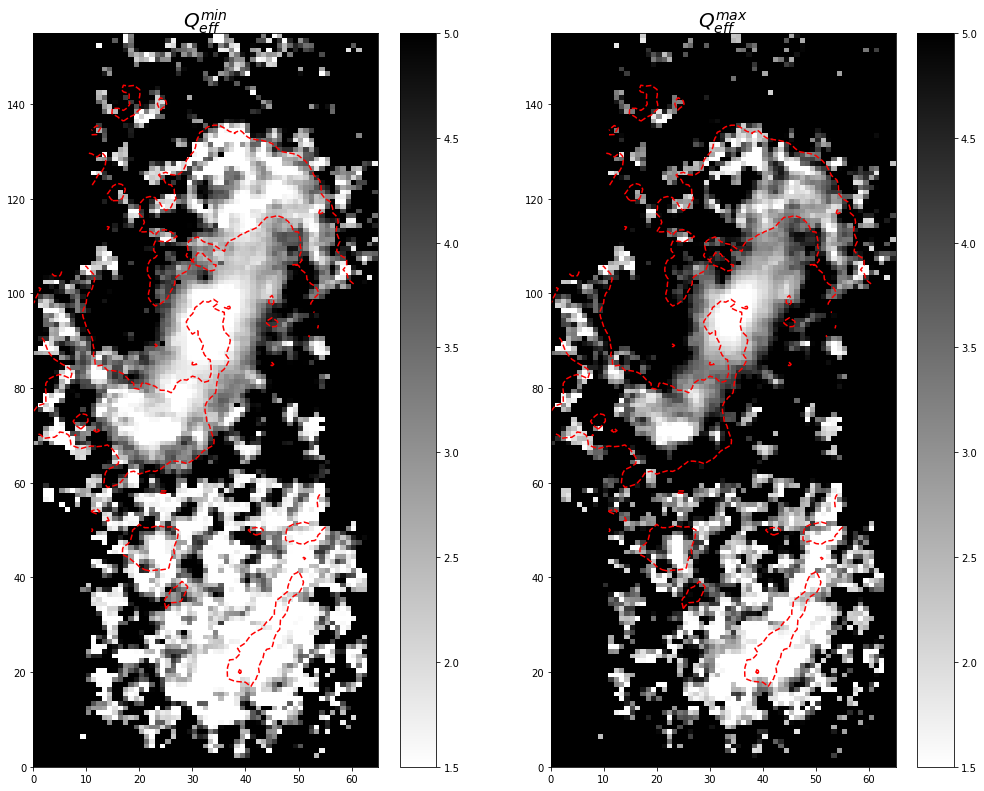

In [73]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.4,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1.5, vmax=5.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.4,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1.5, vmax=5.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

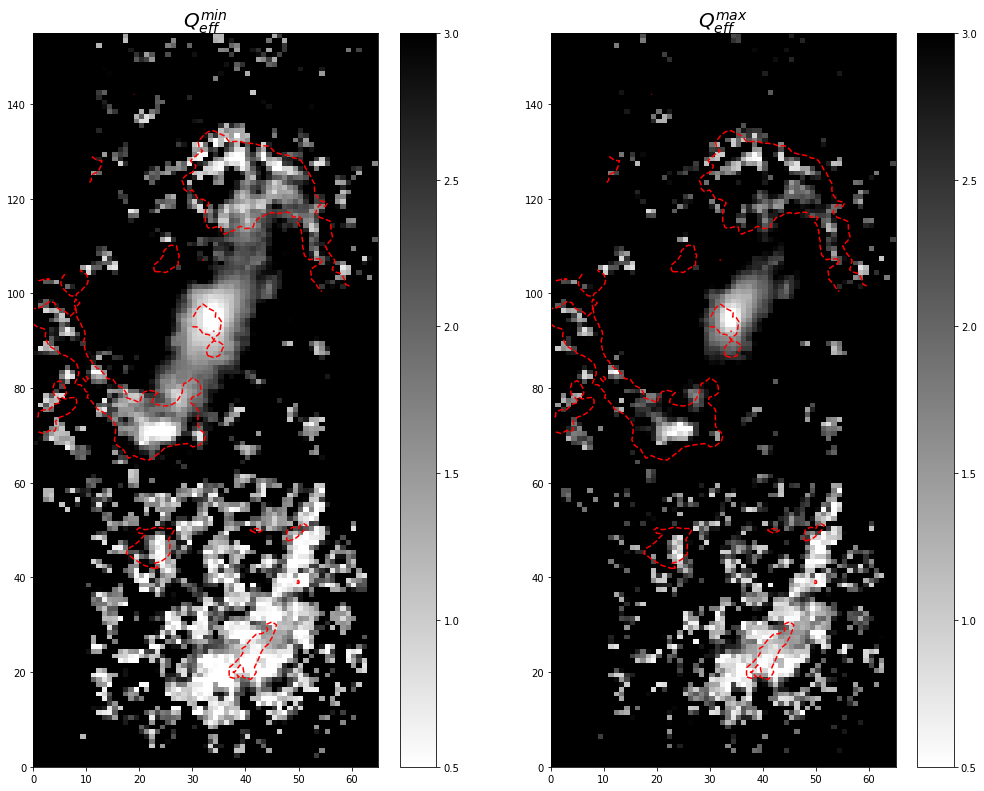

In [74]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.1,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=3.)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.1,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=3.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)


Text(0.5, 1.0, '$Q_{eff}^{max}$')

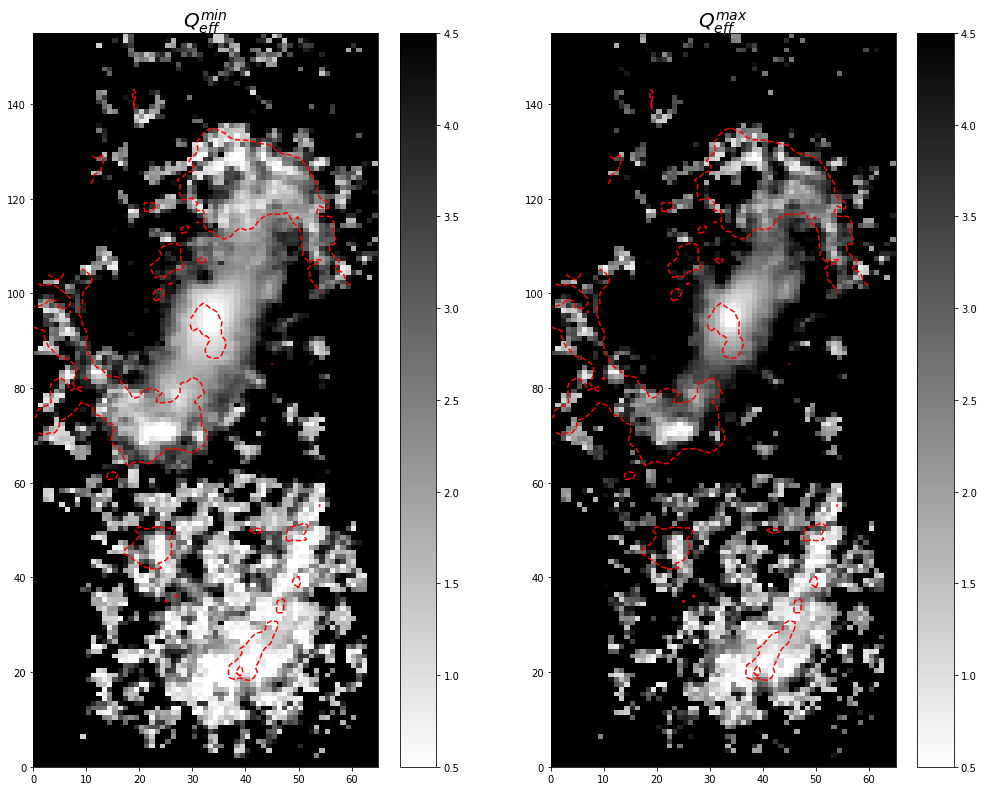

In [75]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 13.5])
plt.subplot(1,2,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=4.5)
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(1,2,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=0.5, vmax=4.5)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

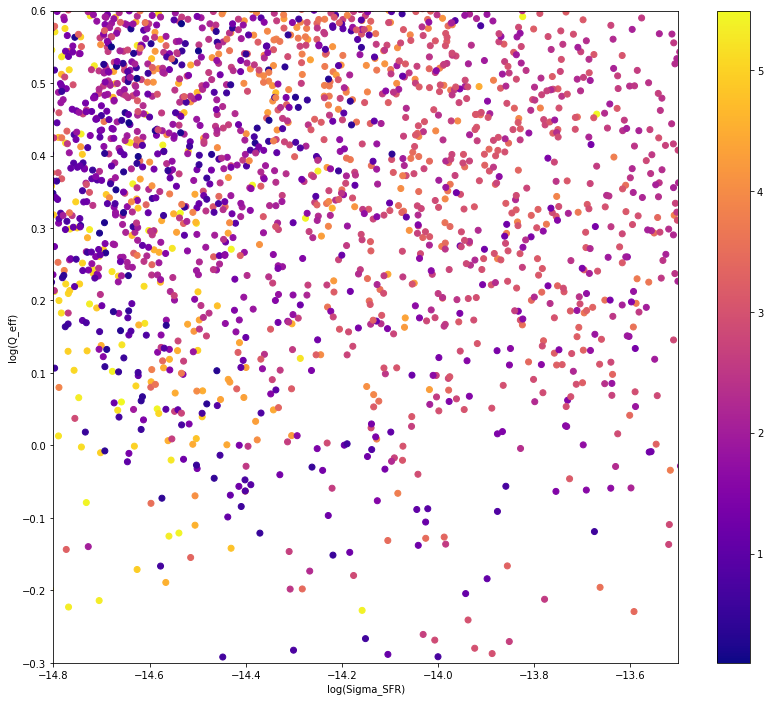

In [8]:
sigma_s = np.load('./data/sigma_s.npy')
H_alpha = np.load('./data/H_alpha.npy')
Qeff_min = np.load('./data/Qeff_min.npy')
dist_kpc = np.load('./data/dist_kpc.npy')
mask = (sigma_s != 0.) & (dist_kpc < 5.5) & (Qeff_min < 5)

# create data
x = np.log10(H_alpha[mask].ravel())
y = np.log10(Qeff_min[mask].ravel())
cmm = (cm.rainbow(np.linspace(0,1,100*len(x))))

# Make the plot
plt.figure(figsize=[14, 12])
# plt.hexbin(x, y, gridsize=100, bins='log', cmap='plasma', vmin=0.2, vmax=1.5)
sc = plt.scatter(x, y, c=[l for l in dist_kpc[mask].ravel()], cmap='plasma')
plt.ylim(-0.3, 0.6)
plt.xlim(-14.8, -13.5)
plt.colorbar(sc)
#plt.axhline(y=np.log10(3.), ls='--', color='g')
#plt.axvline(x=-2.3, ls='--', color='g')
# kslaw = 1.48
# kslaw_bias = 5.
# plt.plot([-4., -2.], [-4.*kslaw+kslaw_bias, -2.*kslaw+kslaw_bias], '--', lw=20, color='g')
plt.xlabel('log(Sigma_SFR)')
plt.ylabel('log(Q_eff)')
plt.show()

# Instability based on galactic shear

$$ \Sigma_{gas} > \frac{2.5 A \sigma_{g}}{\pi G}$$

 $A = 0.5 ( \dfrac{v(r_{gal})}{r_{gal}} - \dfrac{dv(r_{gal})}{dr_{gal}} ) $


Посчитаем критическое значение плотности газа для каждого пикселя

In [5]:
Sigma_H2 = np.load('./data/Sigma_H2.npy')
sigma_HI = np.load('./data/sigma_HI.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
r_HI = np.load('./data/r_HI.npy')
vel_HI = np.load('./data/vel_HI.npy')
dist_kpc = np.load('./data/dist_kpc.npy')

In [6]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))

In [29]:
G = 4.32
Sigma_crit = np.zeros(dist_kpc.shape)
max_dist = dist_kpc.max()
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        if (dist_kpc[i][j] <= 1/3 * max_dist):
            beta = 0.75
        elif ((dist_kpc[i][j] > 1/3 * max_dist) and (dist_kpc[i][j] <= 2/3 * max_dist)):
            beta = 0.5
        elif ((dist_kpc[i][j] > 2/3 * max_dist) and (dist_kpc[i][j] <= max_dist)):  
            beta = 0.1
        A = 0.5 * velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] * (1-beta) 
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = 2.5 * A * sigma_g / np.pi / G

In [30]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        if(Sigma_gas > Sigma_crit[i][j]):
            Inst_field[i][j] = 1
        else: 
            Inst_field[i][j] = 0

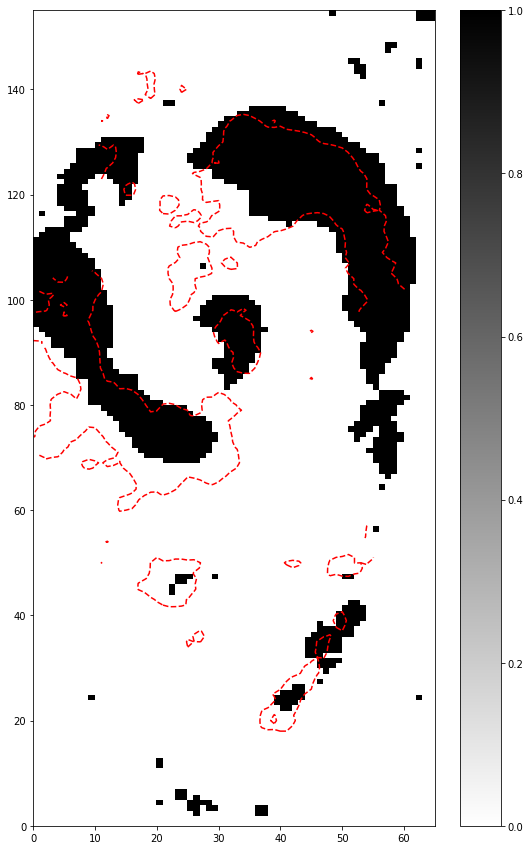

In [31]:
H_alpha = np.load('./data/H_alpha.npy')
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

In [32]:
Inst_field1 = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        Inst_field1[i][j] = Sigma_crit[i][j] / Sigma_gas 

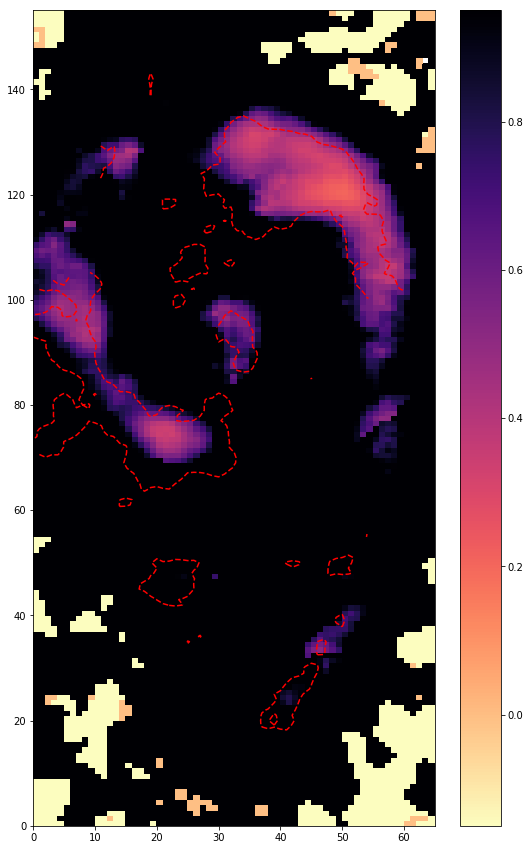

In [33]:
H_alpha = np.load('./data/H_alpha.npy')
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field1, cmap='magma_r')
quadmesh.set_clim(vmin=-0.15, vmax = 0.95)
plt.colorbar()

In [103]:
G = 4.32
dR =(Distance*1000*2*np.pi)/(360*60*60.)
Sigma_crit = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
 
        A = 0.5 * (velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] - velocity_approx.deriv()(dist_kpc[i][j]))  
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = 2.5 * A * sigma_g / np.pi / G

In [104]:
Inst_field = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        if(Sigma_gas > Sigma_crit[i][j]):
            Inst_field[i][j] = 1
        else: 
            Inst_field[i][j] = 0

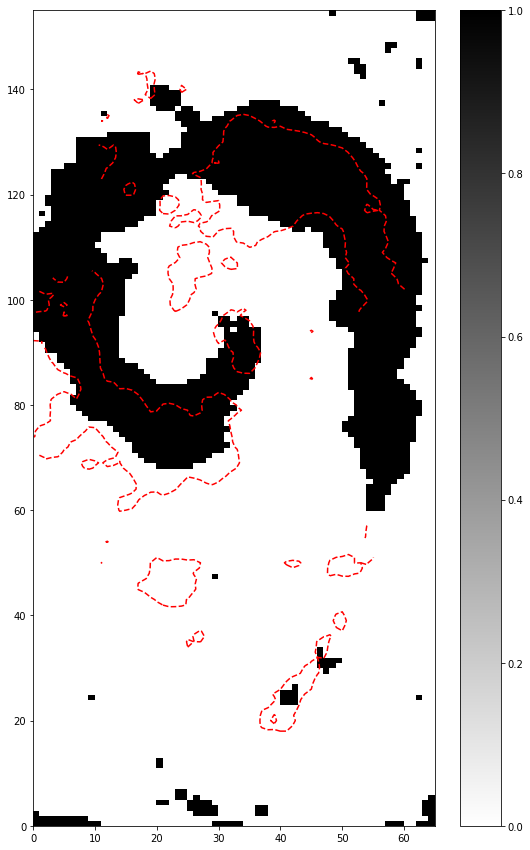

In [105]:
H_alpha = np.load('./data/H_alpha.npy')
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.3,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Inst_field, cmap='gist_yarg')
plt.colorbar()

In [106]:
shear_method = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        shear_method[i][j] = Sigma_crit[i][j] / Sigma_gas 
        
np.save('./data/shear_method.npy', shear_method)        

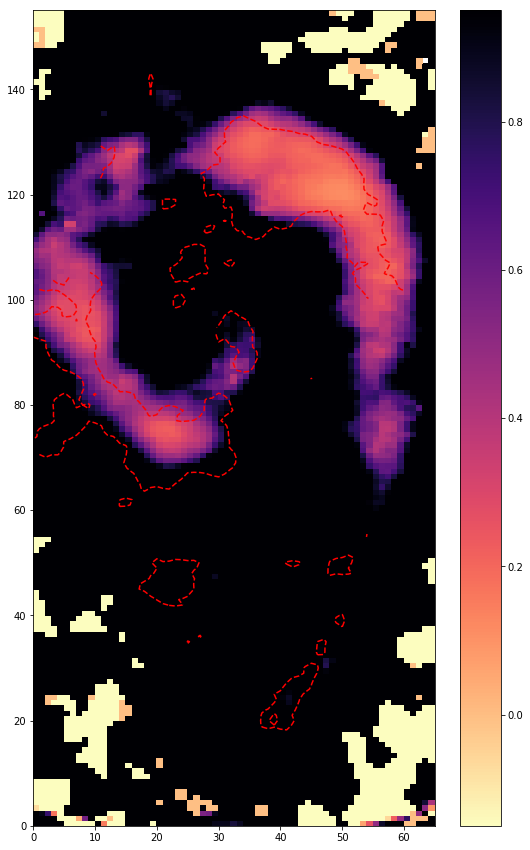

In [107]:
H_alpha = np.load('./data/H_alpha.npy')
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
fig = plt.figure(figsize=[9,15])
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.2,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, shear_method, cmap='magma_r')
quadmesh.set_clim(vmin=-0.15, vmax = 0.95)
plt.colorbar()

In [119]:
G = 4.32
dR =(Distance*1000*2*np.pi)/(360*60*60.)
Sigma_crit = np.zeros(dist_kpc.shape)
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
 
        A = 0.5 * (velocity_approx(dist_kpc[i][j]) / dist_kpc[i][j] - velocity_approx.deriv()(dist_kpc[i][j]))  
        sigma_g = sigma_HI[i][j]/1000.
  
        Sigma_crit[i][j] = A * sigma_g / np.pi / G # без умножения на alpha_A
    
shear_method = np.zeros(dist_kpc.shape)

for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        Sigma_gas = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        shear_method[i][j] = Sigma_crit[i][j] / Sigma_gas 
      


       

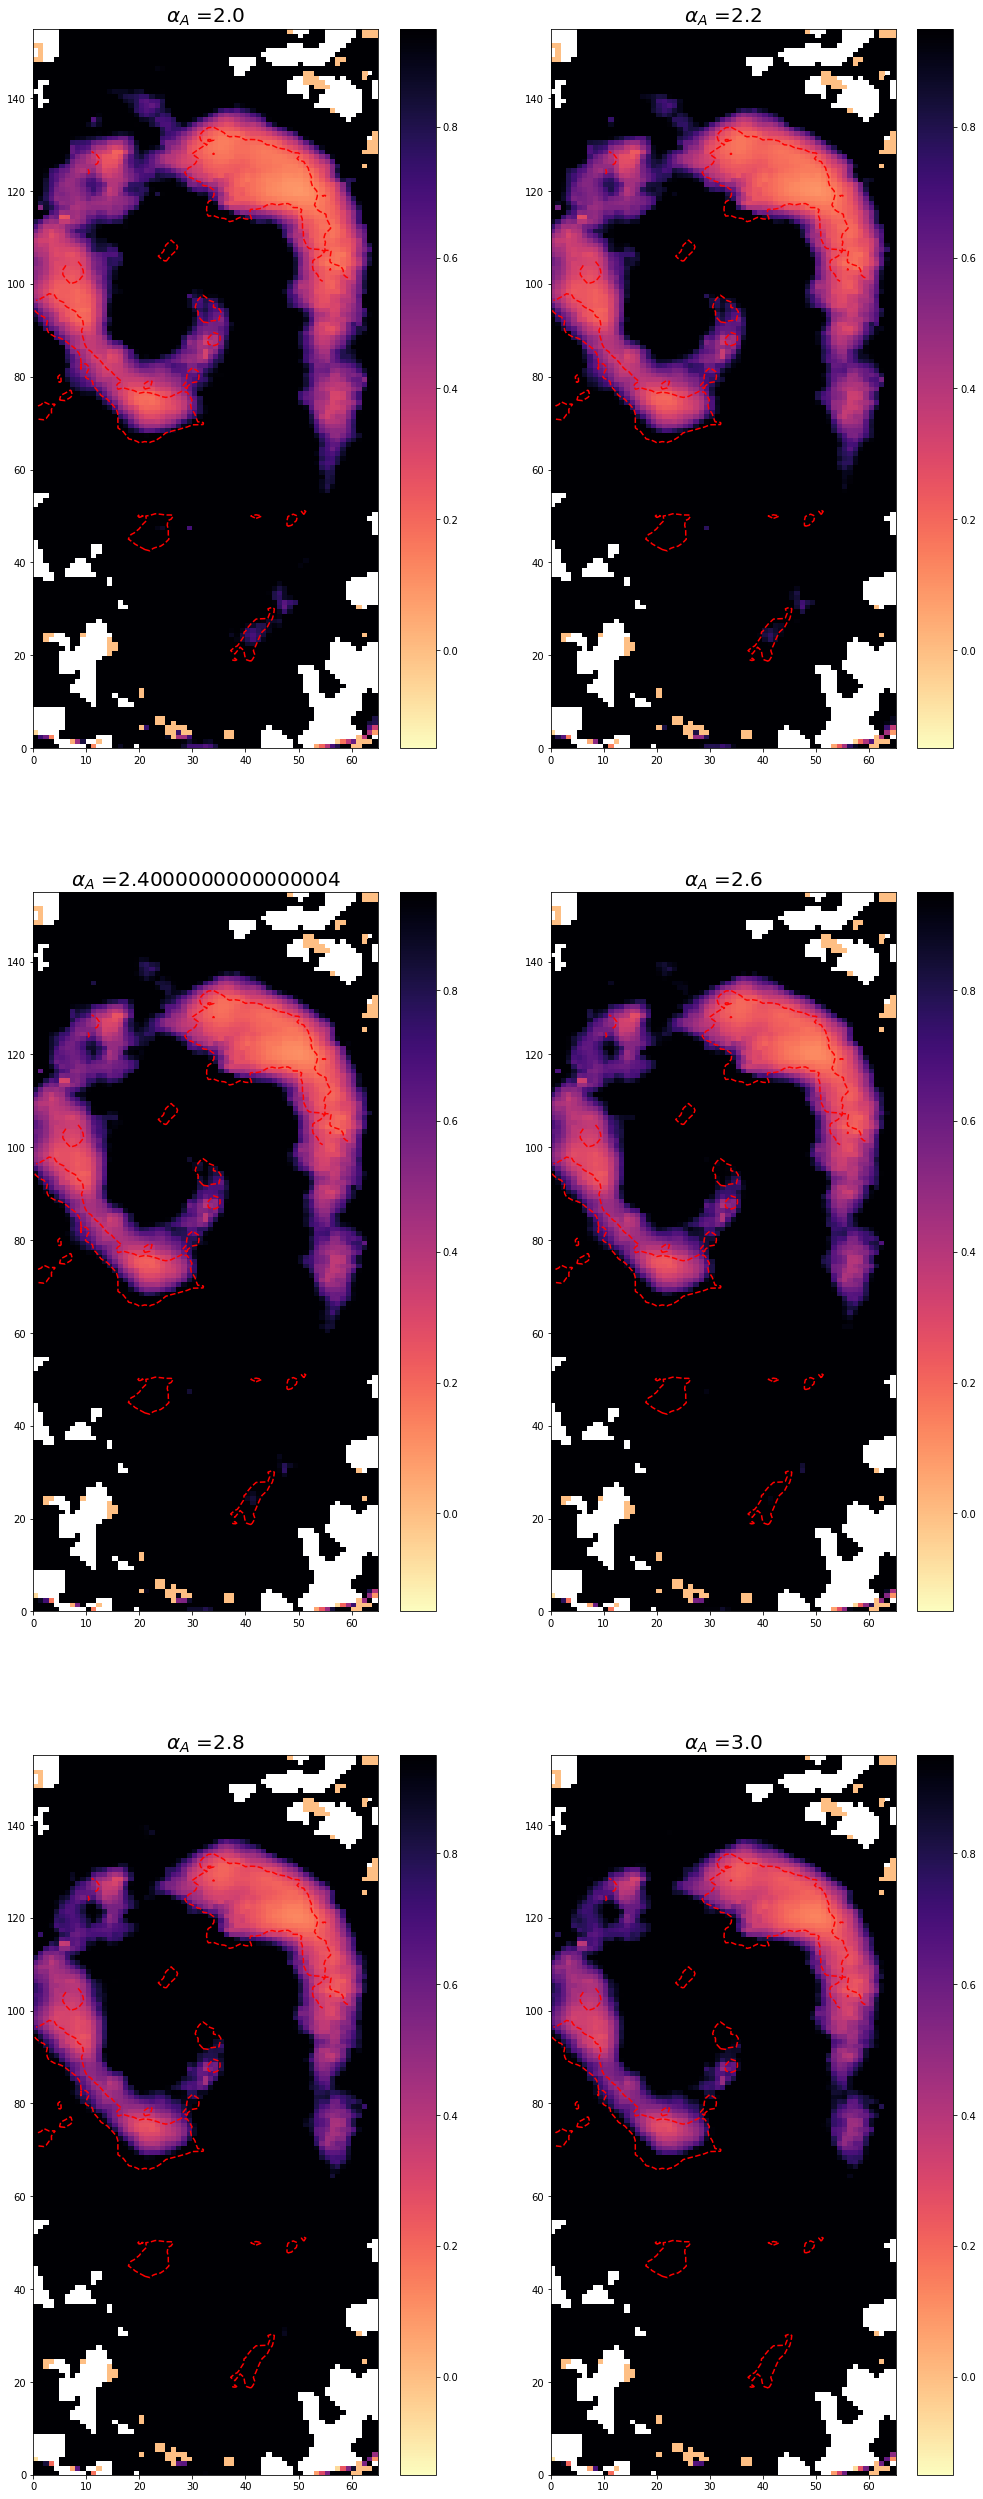

In [121]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[17, 45])
for i in range(1,7,1):
    plt.subplot(3,2,i)
    CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
    quadmesh = plt.pcolormesh(X, Y, shear_method*(1.8+i*0.2), cmap='magma_r')
    quadmesh.set_clim(vmin=-0.15, vmax = 0.95)
    quadmesh.cmap.set_under('white')
    plt.colorbar()
    plt.title(r'$\alpha_A$ ='+str(1.8+i*0.2), fontsize=20)


# Азимутальное усреднение

In [76]:
def azimuthal_average(Q, step=None, vmax=None, Qmax=100, vmin=0.):
    az_av = []
    az_dev = []
    for dbin in np.arange(vmin,vmax,step):
        mask = (dist_kpc >= dbin) & (dist_kpc <= dbin + step)
        anulli = Q[mask]
        mask = (anulli < Qmax) & (anulli > 0) 
        anulli = anulli[mask]
        az_av.append(anulli.sum()/mask.sum())
        az_dev.append(np.std(anulli))
    return az_av, az_dev

In [77]:
Qeff_min = np.load('./data/Qeff_min.npy')
Qeff_max = np.load('./data/Qeff_max.npy')
Qg = np.load('./data/Qg.npy')
shear_method = np.load('./data/shear_method.npy')

/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in less
  import sys
/home/lera/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: RuntimeWarning: invalid value encountered in greater
  import sys


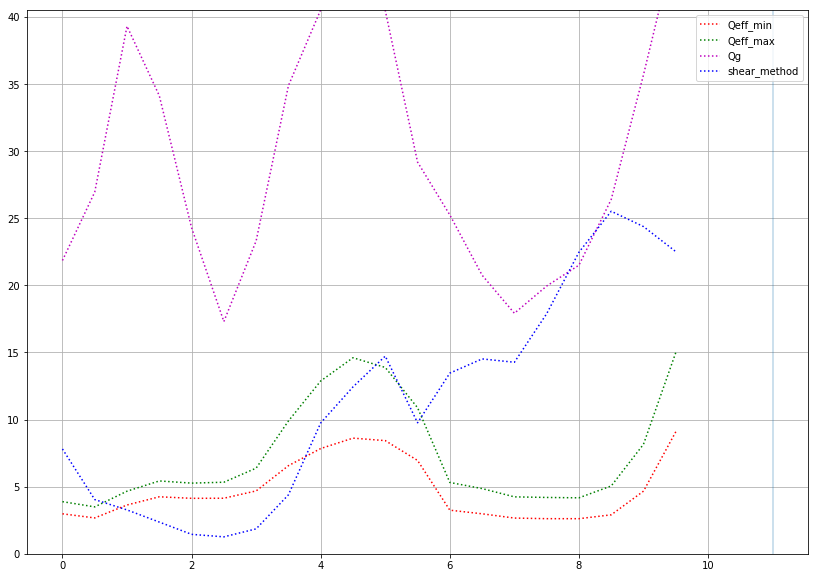

In [80]:
plt.figure(figsize=[14,10])
for ind, Q in enumerate([Qeff_min, Qeff_max, Qg, shear_method]):
    label = ['Qeff_min', 'Qeff_max', 'Qg','shear_method'][ind]
    color = ['r', 'g', 'm','blue'][ind]
    az_av, az_dev = azimuthal_average(Q, step=0.5, vmax=10.)
    plt.plot(np.array(np.arange(0,10.,0.5)), az_av, ':', label=label, color=color)

plt.grid()
plt.legend()
plt.axvline(x=11., alpha=0.3)
plt.ylim(0, 40.5);

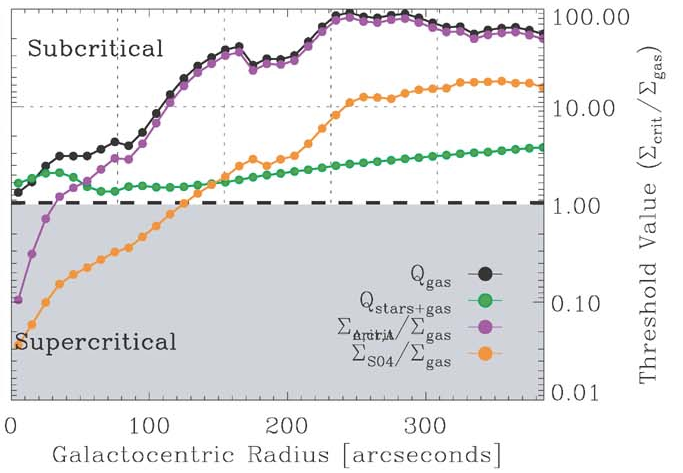

In [75]:
from IPython.display import Image
Image('./images/instability.png')

# Чувствительность к ошибкам

In [122]:
sigma_s = np.load('./data/sigma_s.npy')
Sigma_H2 = np.load('./data/Sigma_H2.npy')
sigma_HI = np.load('./data/sigma_HI.npy')
Sigma_HI = np.load('./data/Sigma_HI.npy')
Sigma_s = np.load('./data/Sigma_s.npy')
sig_R_max = np.load('./data/sig_R_max.npy')
sig_R_min = np.load('./data/sig_R_min.npy')
r_HI = np.load('./data/r_HI.npy')
vel_HI = np.load('./data/vel_HI.npy')
kappa = np.load('./data/kappa.npy')
dist_kpc = np.load('./data/dist_kpc.npy')

In [123]:
velocity_approx = poly1d(polyfit(r_HI, vel_HI, deg=4))

## Варьируем $\Sigma_{H2}$

In [124]:
Sigma_H2_five_up = 1.05 * Sigma_H2 
Sigma_H2_five_down = 0.95 * Sigma_H2 

In [125]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
Qeff_max_five_up = np.zeros(dist_kpc.shape)
Qeff_max_five_down = np.zeros(dist_kpc.shape)
Qeff_min_five_up = np.zeros(dist_kpc.shape)
Qeff_min_five_down = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2_five_up[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_five_up[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_five_up[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
        
        
print('Errors:{}'.format(errors))

functions.ipynb:8: RuntimeWarning: invalid value encountered in double_scalars
  ]


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


In [126]:
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2_five_down[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_five_down[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_five_down[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
        
        
print('Errors:{}'.format(errors))

11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
Errors:9408


Text(0.5, 1.0, '$Q_{eff}^{min}+5\\%$')

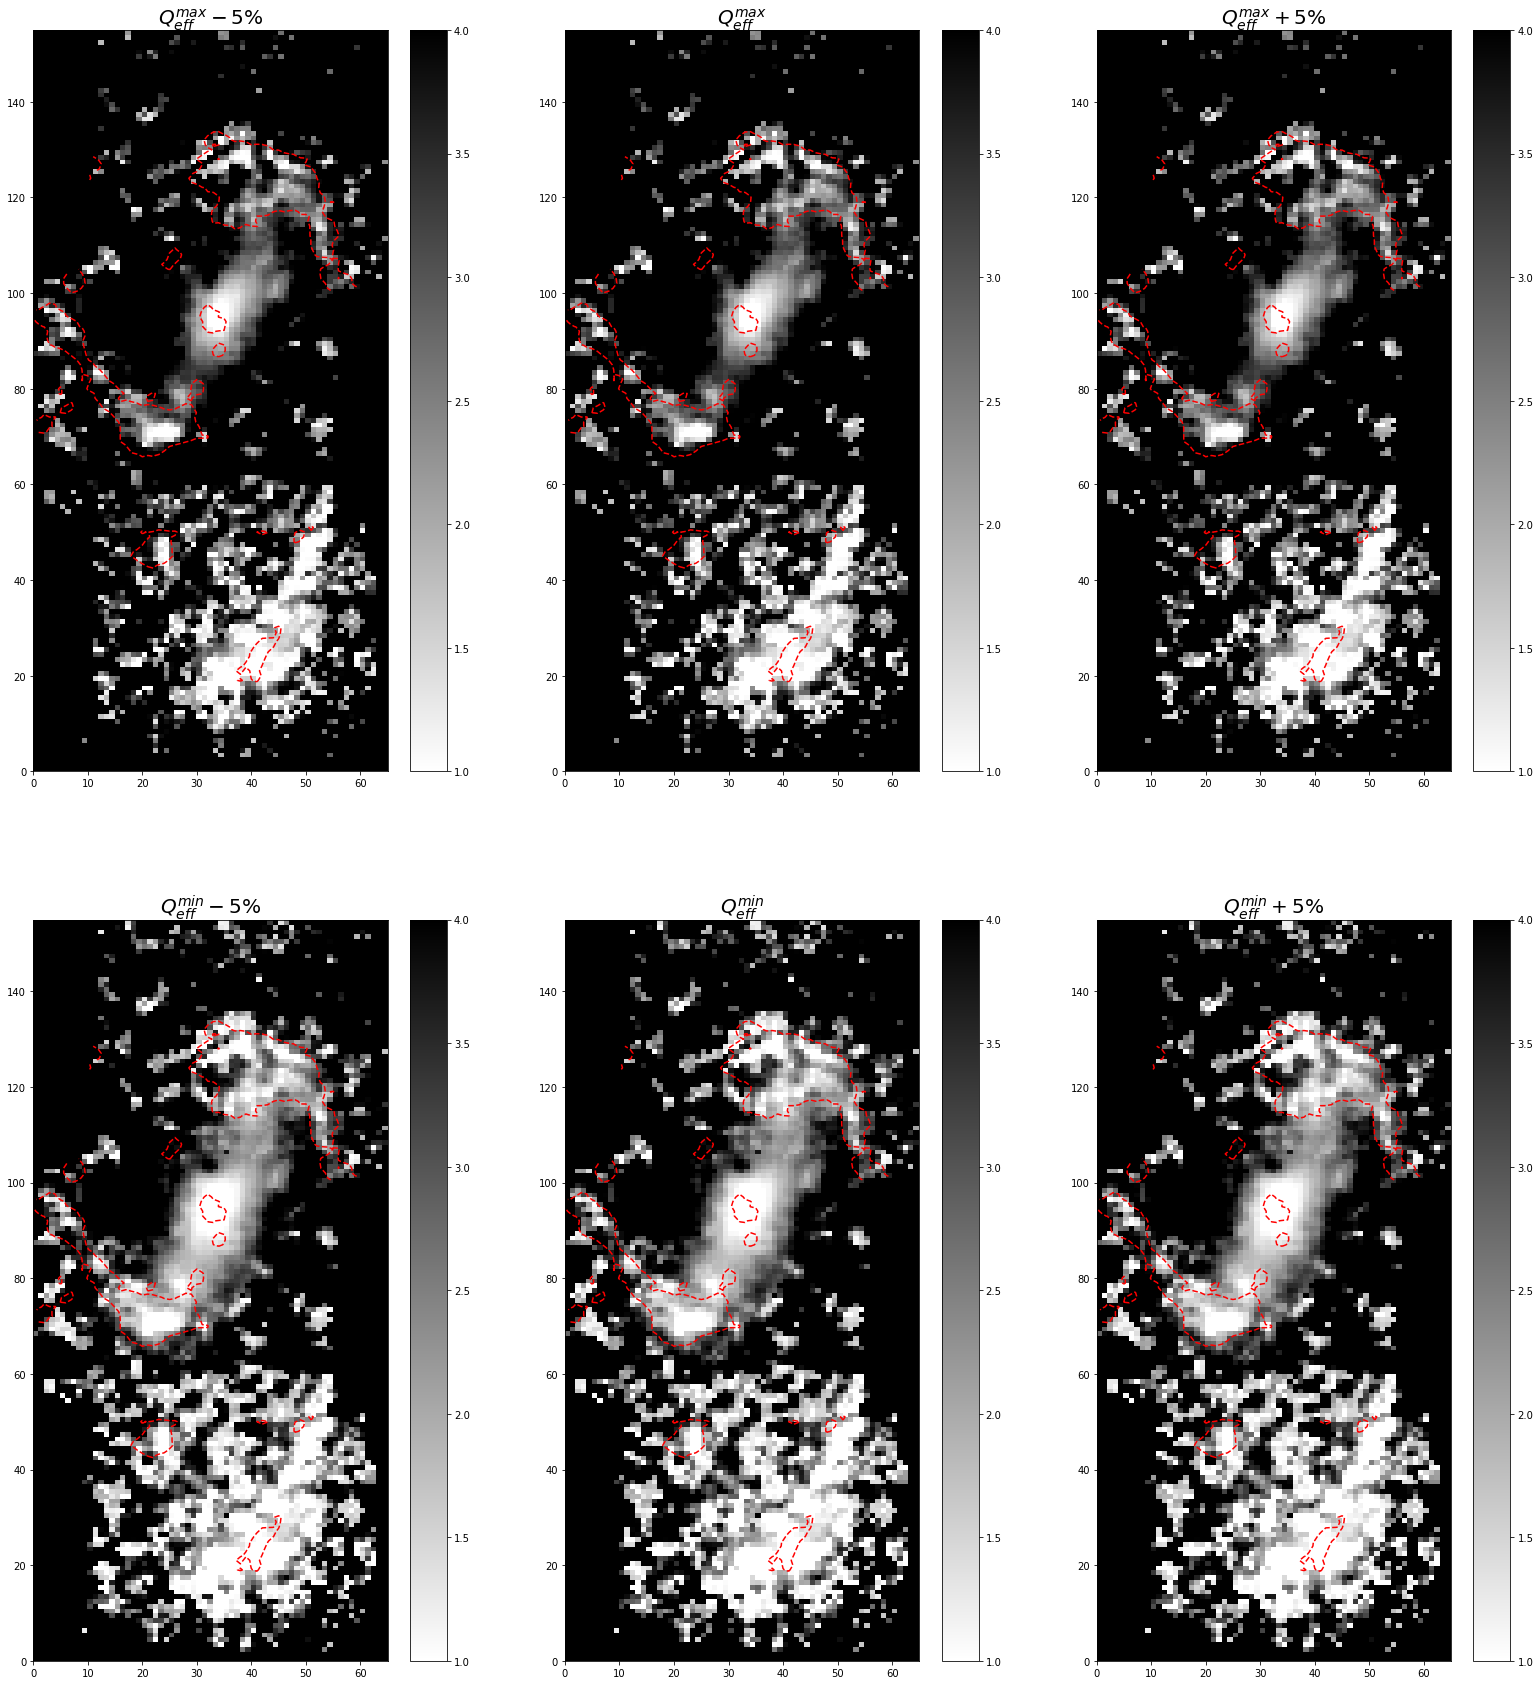

In [130]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[27, 30])
plt.subplot(2,3,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_five_down, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}-5\%$', fontsize=20)

plt.subplot(2,3,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

plt.subplot(2,3,3)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_five_up, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}+5\%$', fontsize=20)

plt.subplot(2,3,4)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min_five_down, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}-5\%$', fontsize=20)

plt.subplot(2,3,5)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(2,3,6)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min_five_up, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}+5\%$', fontsize=20)

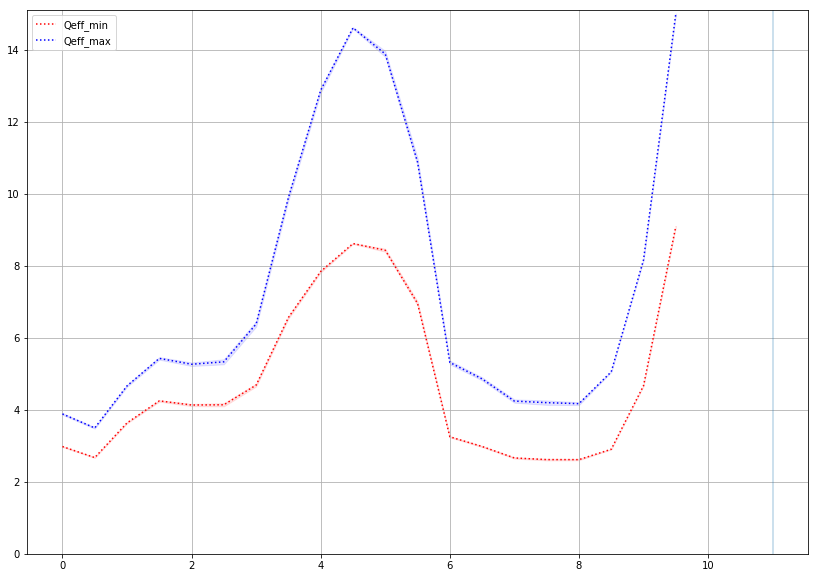

In [145]:
plt.figure(figsize=[14,10])
Qeff_min_az = azimuthal_average(Qeff_min, step=0.5, vmax=10.)[0]
Qeff_min_az_up = azimuthal_average(Qeff_min_five_up, step=0.5, vmax=10.)[0]
Qeff_min_az_down = azimuthal_average(Qeff_min_five_down, step=0.5, vmax=10.)[0]
Qeff_max_az = azimuthal_average(Qeff_max, step=0.5, vmax=10.)[0]
Qeff_max_az_up = azimuthal_average(Qeff_max_five_up, step=0.5, vmax=10.)[0]
Qeff_max_az_down = azimuthal_average(Qeff_max_five_down, step=0.5, vmax=10.)[0]

plt.plot(np.array(np.arange(0,10.,0.5)),Qeff_min_az, ':', label='Qeff_min', color='red')
plt.fill_between(np.array(np.arange(0,10.,0.5)), 
                     np.array(Qeff_min_az_up), 
                     np.array(Qeff_min_az_down), alpha=0.1, color='red') 

plt.plot(np.array(np.arange(0,10.,0.5)),Qeff_max_az, ':', label='Qeff_max', color='blue')
plt.fill_between(np.array(np.arange(0,10.,0.5)), 
                     np.array(Qeff_max_az_up), 
                     np.array(Qeff_max_az_down), alpha=0.1, color='blue') 


plt.grid()
plt.legend()
plt.axvline(x=11., alpha=0.3)
plt.ylim(0, 15.1);

In [131]:
Sigma_H2_ten_up = 1.1 * Sigma_H2 
Sigma_H2_ten_down = 0.9 * Sigma_H2

In [132]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
Qeff_max_ten_up = np.zeros(dist_kpc.shape)
Qeff_max_ten_down = np.zeros(dist_kpc.shape)
Qeff_min_ten_up = np.zeros(dist_kpc.shape)
Qeff_min_ten_down = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2_ten_up[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_ten_up[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_ten_up[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
        
        
print('Errors:{}'.format(errors))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


In [133]:
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2_ten_down[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_ten_down[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_ten_down[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
        
        
print('Errors:{}'.format(errors))

11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
Errors:9408


Text(0.5, 1.0, '$Q_{eff}^{min}+10\\%$')

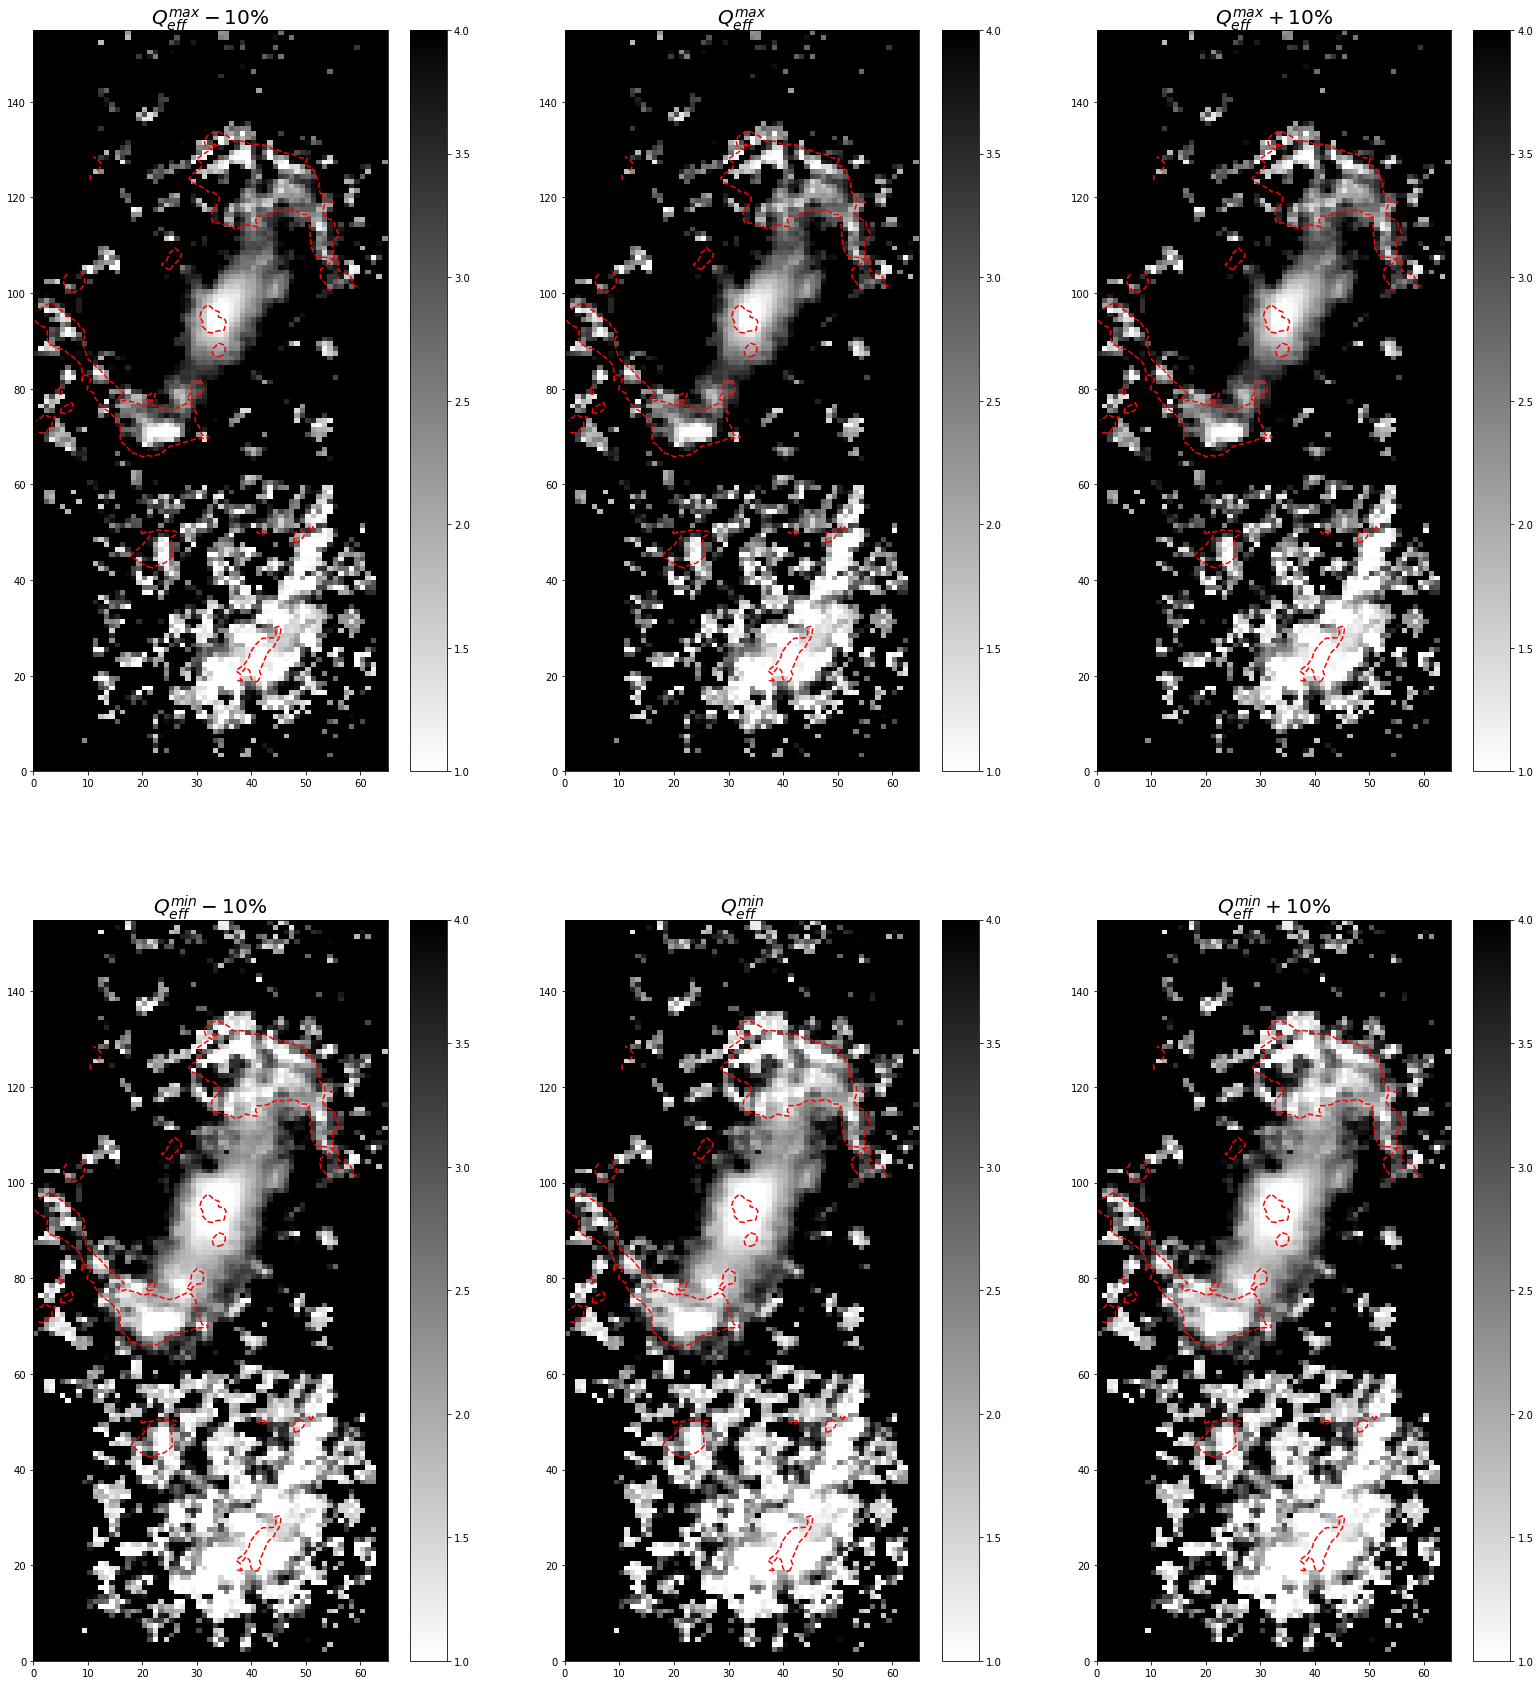

In [134]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[27, 30])
plt.subplot(2,3,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_ten_down, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}-10\%$', fontsize=20)

plt.subplot(2,3,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

plt.subplot(2,3,3)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_ten_up, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}+10\%$', fontsize=20)

plt.subplot(2,3,4)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min_ten_down, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}-10\%$', fontsize=20)

plt.subplot(2,3,5)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(2,3,6)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min_ten_up, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}+10\%$', fontsize=20)

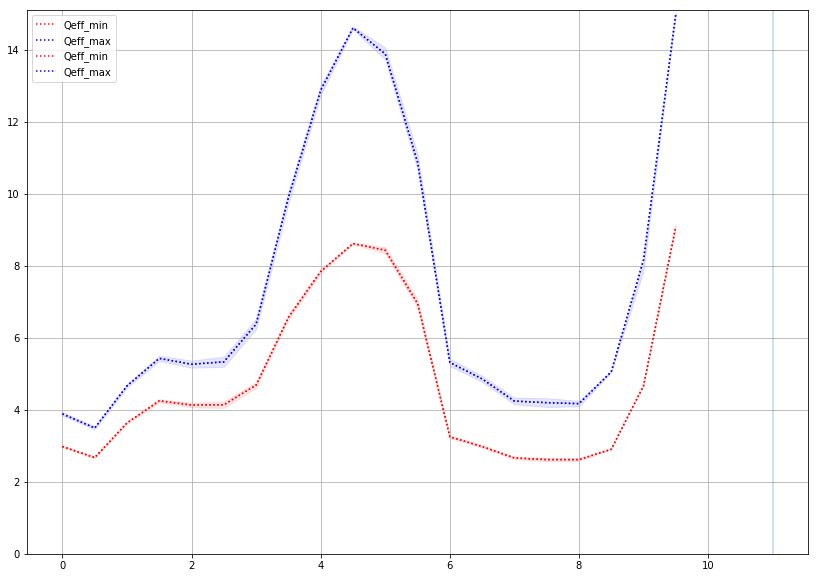

In [136]:
plt.figure(figsize=[14,10])
for ind, Q in enumerate([Qeff_min, Qeff_max]):
    label = ['Qeff_min', 'Qeff_max'][ind]
    color = ['r', 'blue'][ind]
    az_av, az_dev = azimuthal_average(Q, step=0.5, vmax=10.)
    plt.plot(np.array(np.arange(0,10.,0.5)), az_av, ':', label=label, color=color)
    
Qeff_min_az = azimuthal_average(Qeff_min, step=0.5, vmax=10.)[0]
Qeff_min_az_up = azimuthal_average(Qeff_min_ten_up, step=0.5, vmax=10.)[0]
Qeff_min_az_down = azimuthal_average(Qeff_min_ten_down, step=0.5, vmax=10.)[0]
Qeff_max_az = azimuthal_average(Qeff_max, step=0.5, vmax=10.)[0]
Qeff_max_az_up = azimuthal_average(Qeff_max_ten_up, step=0.5, vmax=10.)[0]
Qeff_max_az_down = azimuthal_average(Qeff_max_ten_down, step=0.5, vmax=10.)[0]

plt.plot(np.array(np.arange(0,10.,0.5)),Qeff_min_az, ':', label='Qeff_min', color='red')
plt.fill_between(np.array(np.arange(0,10.,0.5)), 
                     np.array(Qeff_min_az_up), 
                     np.array(Qeff_min_az_down), alpha=0.1, color='red') 

plt.plot(np.array(np.arange(0,10.,0.5)),Qeff_max_az, ':', label='Qeff_max', color='blue')
plt.fill_between(np.array(np.arange(0,10.,0.5)), 
                     np.array(Qeff_max_az_up), 
                     np.array(Qeff_max_az_down), alpha=0.1, color='blue') 


plt.grid()
plt.legend()
plt.axvline(x=11., alpha=0.3)
plt.ylim(0, 15.1);

In [137]:
Sigma_H2_twenty_up = 1.2 * Sigma_H2 
Sigma_H2_twenty_down = 0.8 * Sigma_H2 

In [138]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
Qeff_max_twenty_up = np.zeros(dist_kpc.shape)
Qeff_max_twenty_down = np.zeros(dist_kpc.shape)
Qeff_min_twenty_up = np.zeros(dist_kpc.shape)
Qeff_min_twenty_down = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2_twenty_up[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_twenty_up[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_twenty_up[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
        
        
print('Errors:{}'.format(errors))

functions.ipynb:8: RuntimeWarning: invalid value encountered in double_scalars
  ]


1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


In [139]:
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2_twenty_down[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max[i][j]
        s_R_min = sig_R_min[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_twenty_down[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_twenty_down[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
        
        
print('Errors:{}'.format(errors))

11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
Errors:9408


/home/lera/.local/lib/python3.5/site-packages/matplotlib/contour.py:1000: UserWarning: The following kwargs were not used by contour: 'aspect'
  s)


Text(0.5, 1.0, '$Q_{eff}^{min}+20\\%$')

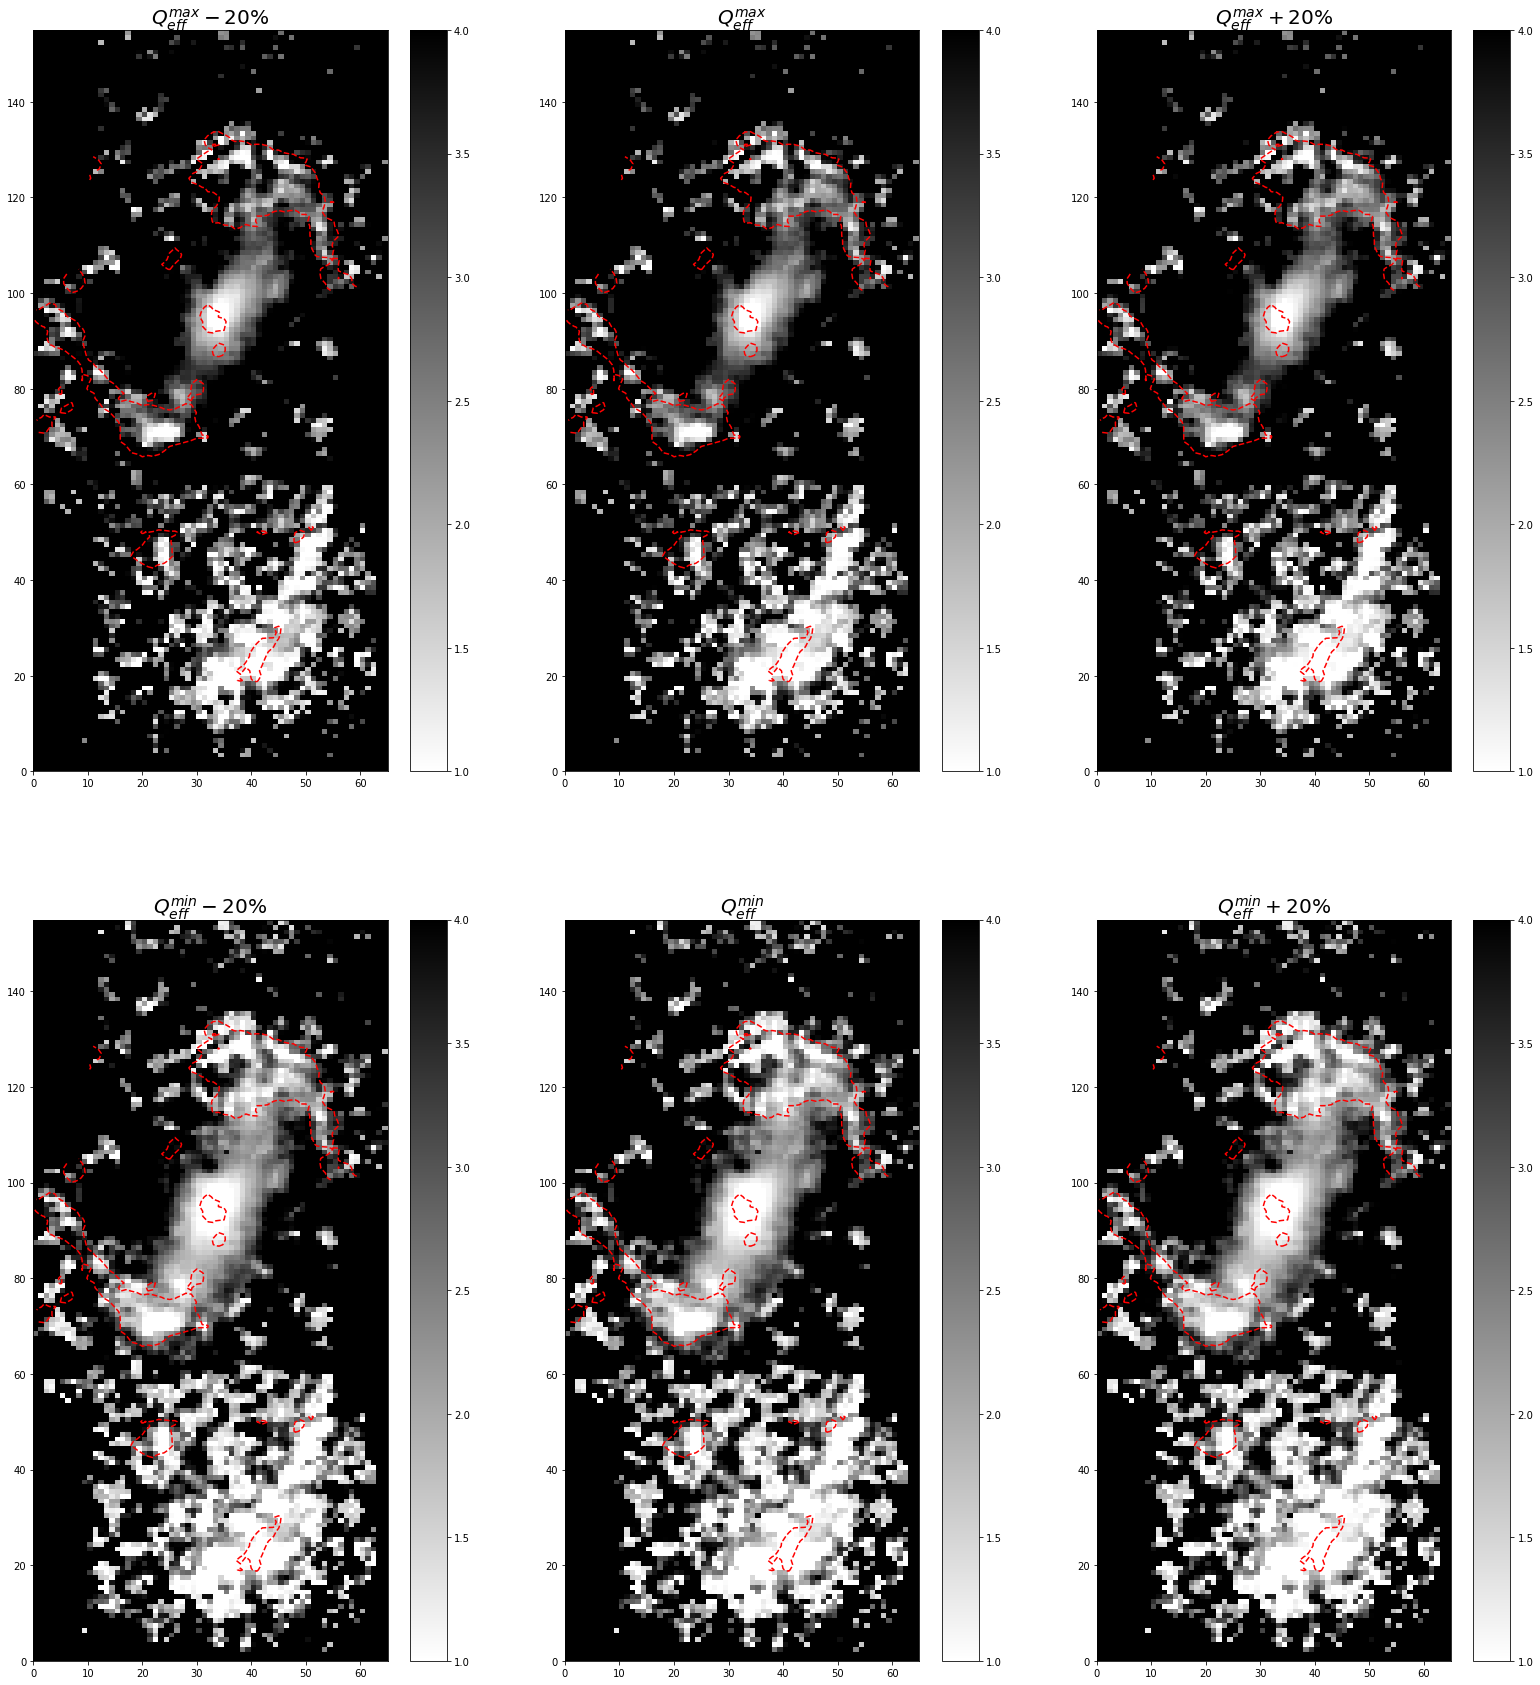

In [141]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[27, 30])
plt.subplot(2,3,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_twenty_down, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}-20\%$', fontsize=20)

plt.subplot(2,3,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

plt.subplot(2,3,3)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_twenty_up, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}+20\%$', fontsize=20)

plt.subplot(2,3,4)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min_twenty_down, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}-20\%$', fontsize=20)

plt.subplot(2,3,5)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(2,3,6)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min_twenty_up, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}+20\%$', fontsize=20)

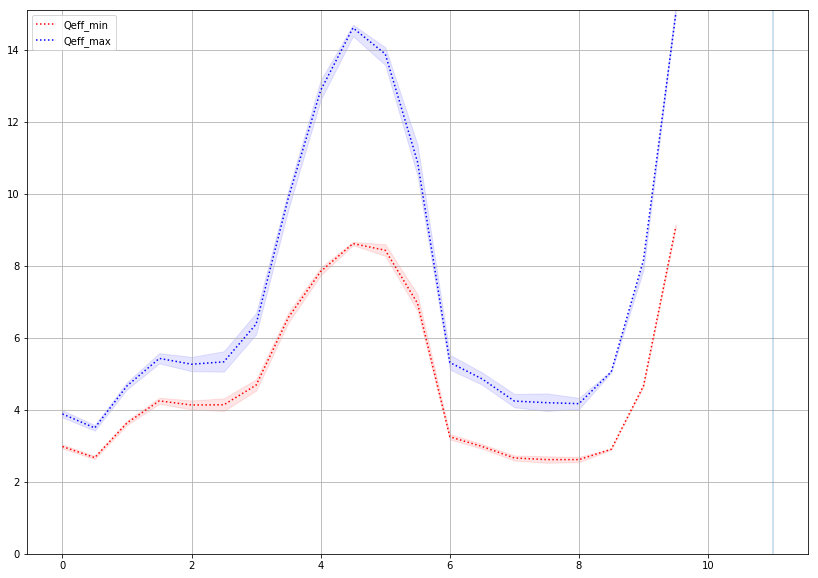

In [146]:
plt.figure(figsize=[14,10])
Qeff_min_az = azimuthal_average(Qeff_min, step=0.5, vmax=10.)[0]
Qeff_min_az_up = azimuthal_average(Qeff_min_twenty_up, step=0.5, vmax=10.)[0]
Qeff_min_az_down = azimuthal_average(Qeff_min_twenty_down, step=0.5, vmax=10.)[0]
Qeff_max_az = azimuthal_average(Qeff_max, step=0.5, vmax=10.)[0]
Qeff_max_az_up = azimuthal_average(Qeff_max_twenty_up, step=0.5, vmax=10.)[0]
Qeff_max_az_down = azimuthal_average(Qeff_max_twenty_down, step=0.5, vmax=10.)[0]

plt.plot(np.array(np.arange(0,10.,0.5)),Qeff_min_az, ':', label='Qeff_min', color='red')
plt.fill_between(np.array(np.arange(0,10.,0.5)), 
                     np.array(Qeff_min_az_up), 
                     np.array(Qeff_min_az_down), alpha=0.1, color='red') 

plt.plot(np.array(np.arange(0,10.,0.5)),Qeff_max_az, ':', label='Qeff_max', color='blue')
plt.fill_between(np.array(np.arange(0,10.,0.5)), 
                     np.array(Qeff_max_az_up), 
                     np.array(Qeff_max_az_down), alpha=0.1, color='blue') 


plt.grid()
plt.legend()
plt.axvline(x=11., alpha=0.3)
plt.ylim(0, 15.1);

## Варьируем $\sigma_{s}^{min}$, $\sigma_{s}^{max}$

In [153]:
sig_R_max_ten_up = 1.2 * sig_R_max 
sig_R_max_ten_down = 0.8 * sig_R_max 
sig_R_min_ten_up = 1.2 * sig_R_min 
sig_R_min_ten_down = 0.8 * sig_R_min 

In [154]:
dR =(Distance*1000*2*np.pi)/(360*60*60.)
G = 4.32
Qeff_max_ten_up = np.zeros(dist_kpc.shape)
Qeff_max_ten_down = np.zeros(dist_kpc.shape)
Qeff_min_ten_up = np.zeros(dist_kpc.shape)
Qeff_min_ten_down = np.zeros(dist_kpc.shape)
bark = np.zeros(dist_kpc.shape)
bark_max = np.zeros(dist_kpc.shape)
Qg = np.zeros(dist_kpc.shape)
Qs_min = np.zeros(dist_kpc.shape)
Qs_max = np.zeros(dist_kpc.shape)
Sigma_g = np.zeros(dist_kpc.shape)

step = 0
errors = 0
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max_ten_up[i][j]
        s_R_min = sig_R_min_ten_up[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_ten_up[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_ten_up[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
        
        
print('Errors:{}'.format(errors))

1000
2000
3000
4000
5000
6000
7000
8000
9000
10000
Errors:4704


In [155]:
for i, row in enumerate(dist_kpc):
    for j, col in enumerate(dist_kpc[0]):
        step+=1
        if step % 1000 == 0:
            print(step)
        c = sigma_HI[i][j]/1000.
        Sigma_g[i][j] = 1.36*(Sigma_HI[i][j] + Sigma_H2[i][j])
        kappa = functions.epic_freq(velocity_approx, dist_kpc[i][j], dR)
        Sigma_s_ = Sigma_s[i][j]
        s_R_max = sig_R_max_ten_down[i][j]
        s_R_min = sig_R_min_ten_down[i][j]
        Qg[i][j] = kappa * c / (math.pi * G * Sigma_g[i][j])
        Qs_max[i][j] = kappa * s_R_max / (3.36 * G * Sigma_s_)
        Qs_min[i][j] = kappa * s_R_min / (3.36 * G * Sigma_s_)
        
       
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_min[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_min_ten_down[i][j] = 1./qeff
        bark[i][j] = root_for_max
        
        try:
            root_for_max, qeff = functions.FindMaxQeffKinem(rangek=np.arange(0.01, 50., 1.), Qs=Qs_max[i][j], Qg=Qg[i][j], s=c/s_R_min)
        except ValueError:
            errors+=1
            qeff = 0.01
            root_for_max = -1.
        Qeff_max_ten_down[i][j] = 1./qeff
        bark_max[i][j] = root_for_max
        
        
        
print('Errors:{}'.format(errors))

11000
12000
13000
14000
15000
16000
17000
18000
19000
20000
Errors:9408


Text(0.5, 1.0, '$Q_{eff}^{min}+10\\%$')

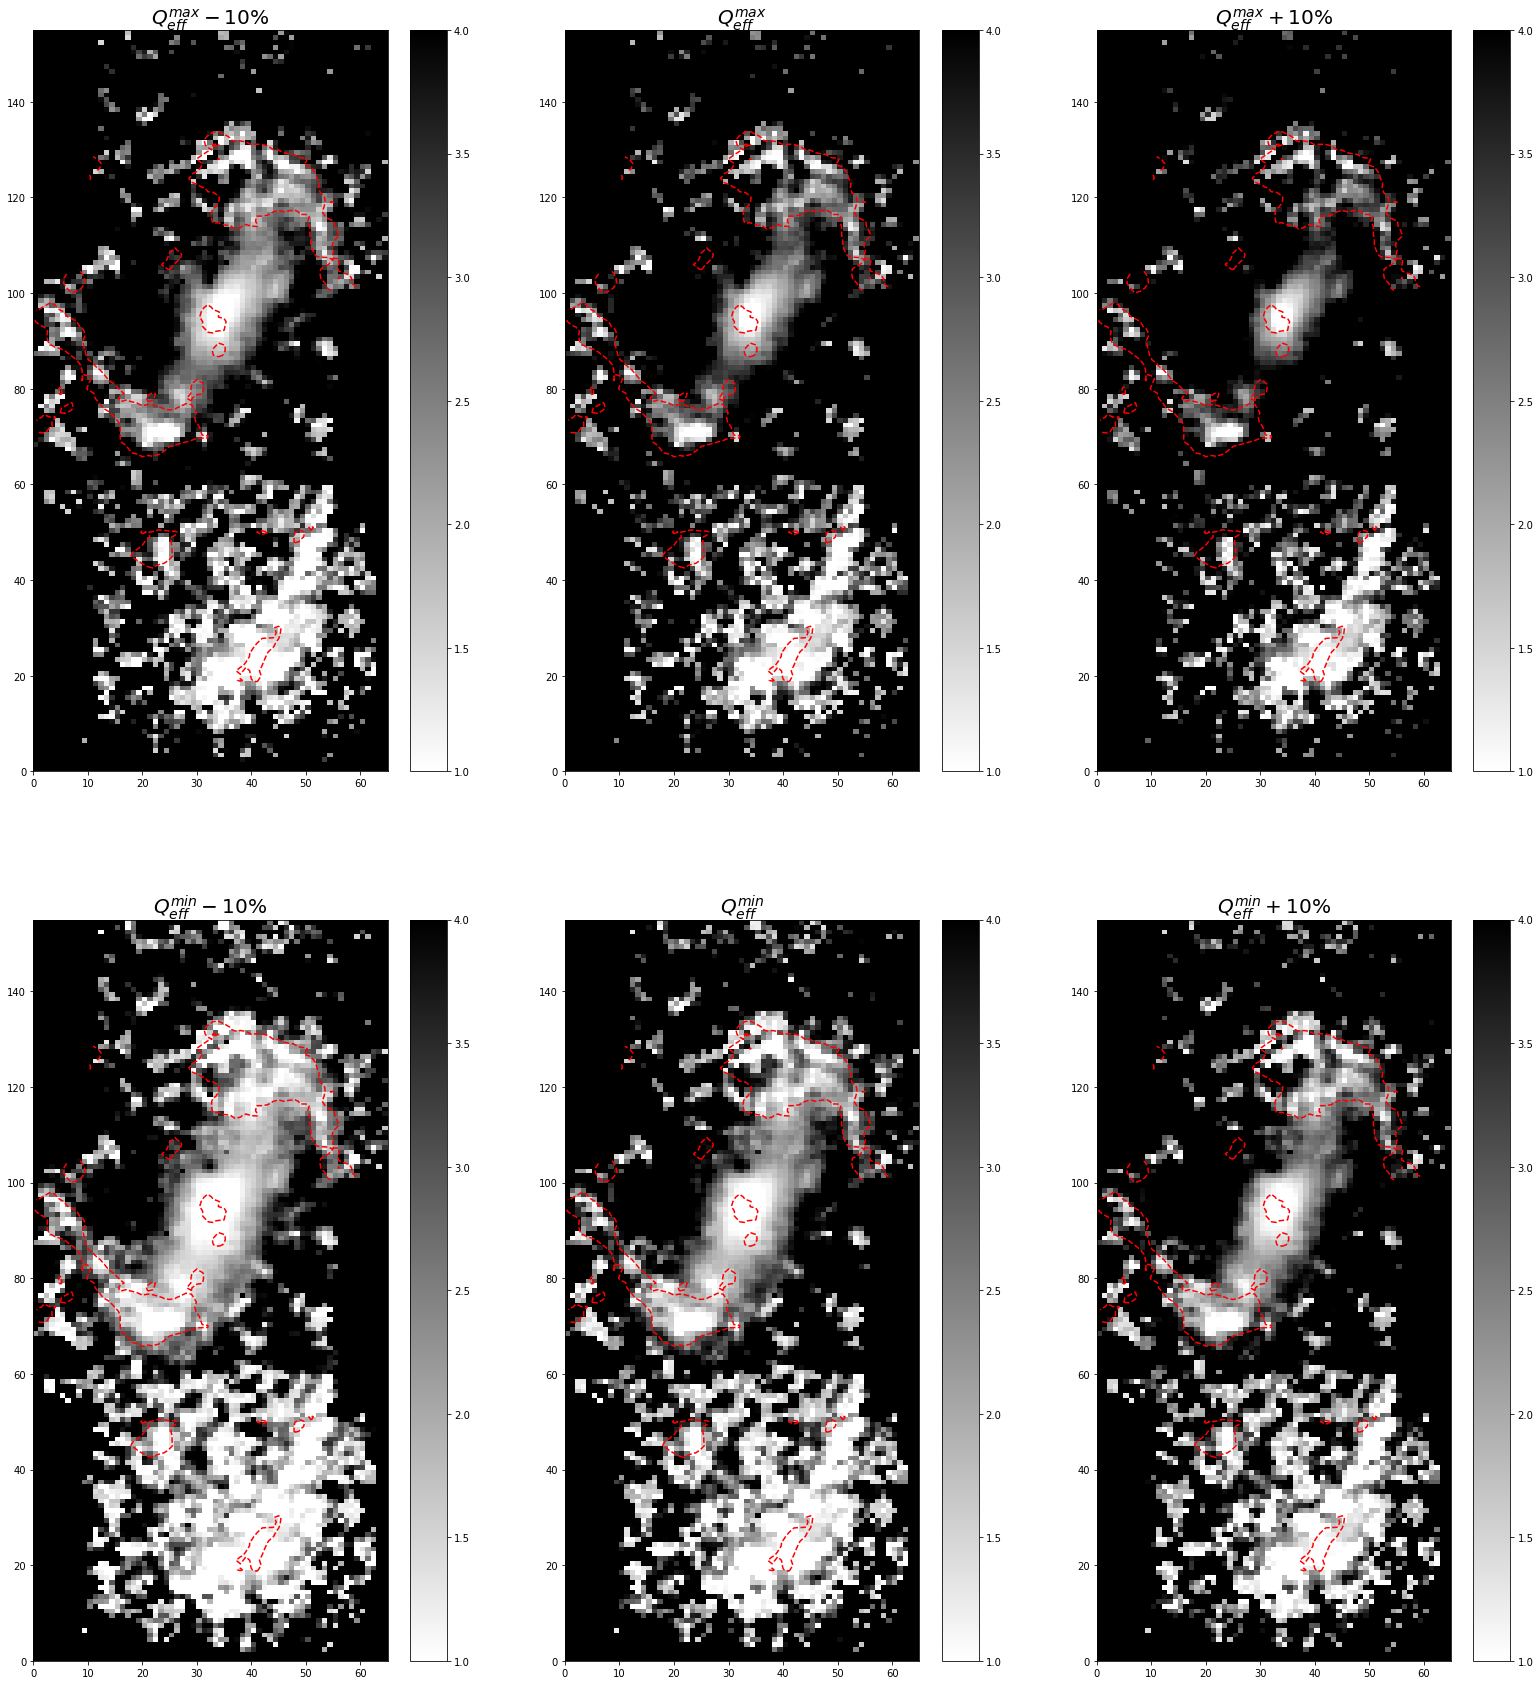

In [156]:
X,Y = np.meshgrid(np.arange(0.,66,1), np.arange(0.,156,1))
plt.figure(figsize=[27, 30])
plt.subplot(2,3,1)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_ten_down, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}-10\%$', fontsize=20)

plt.subplot(2,3,2)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}$', fontsize=20)

plt.subplot(2,3,3)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_max_ten_up, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{max}+10\%$', fontsize=20)

plt.subplot(2,3,4)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min_ten_down, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}-10\%$', fontsize=20)

plt.subplot(2,3,5)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}$', fontsize=20)

plt.subplot(2,3,6)
CS = plt.contour(X, Y, np.log10(H_alpha), levels=[-14.,-12], aspect='auto', alpha=1, colors='red')
quadmesh = plt.pcolormesh(X, Y, Qeff_min_ten_up, cmap='gist_yarg')
quadmesh.set_clim(vmin=1., vmax=4.)
quadmesh.cmap.set_under('white')
plt.colorbar()
plt.title(r'$Q_{eff}^{min}+10\%$', fontsize=20)

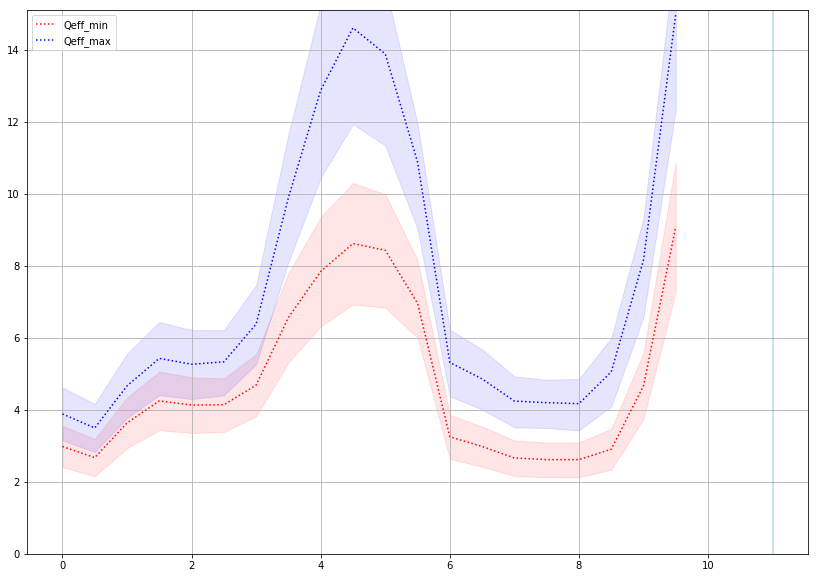

In [157]:
plt.figure(figsize=[14,10])
Qeff_min_az = azimuthal_average(Qeff_min, step=0.5, vmax=10.)[0]
Qeff_min_az_up = azimuthal_average(Qeff_min_ten_up, step=0.5, vmax=10.)[0]
Qeff_min_az_down = azimuthal_average(Qeff_min_ten_down, step=0.5, vmax=10.)[0]
Qeff_max_az = azimuthal_average(Qeff_max, step=0.5, vmax=10.)[0]
Qeff_max_az_up = azimuthal_average(Qeff_max_ten_up, step=0.5, vmax=10.)[0]
Qeff_max_az_down = azimuthal_average(Qeff_max_ten_down, step=0.5, vmax=10.)[0]

plt.plot(np.array(np.arange(0,10.,0.5)),Qeff_min_az, ':', label='Qeff_min', color='red')
plt.fill_between(np.array(np.arange(0,10.,0.5)), 
                     np.array(Qeff_min_az_up), 
                     np.array(Qeff_min_az_down), alpha=0.1, color='red') 

plt.plot(np.array(np.arange(0,10.,0.5)),Qeff_max_az, ':', label='Qeff_max', color='blue')
plt.fill_between(np.array(np.arange(0,10.,0.5)), 
                     np.array(Qeff_max_az_up), 
                     np.array(Qeff_max_az_down), alpha=0.1, color='blue') 


plt.grid()
plt.legend()
plt.axvline(x=11., alpha=0.3)
plt.ylim(0, 15.1);